In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
import re
# from wordcloud import WordCloud,STOPWORDS

np.set_printoptions(suppress=True)

In [5]:
# Load data

df = pd.read_csv('Global YouTube Statistics.csv',encoding='windows-1254')

df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [6]:
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [7]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [8]:
df.tail()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501
994,995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,...,100000.0,2017.0,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [9]:
df.shape

(995, 28)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [11]:
df[['Youtuber','created_year']]

,Youtuber,created_year
0,T-Series,2006.0
1,YouTube Movies,2006.0
2,MrBeast,2012.0
3,Cocomelon - Nursery Rhymes,2006.0
4,SET India,2006.0
...,...,...
990,Natan por Aï¿,2017.0
991,Free Fire India Official,2018.0
992,Panda,2006.0
993,RobTopGames,2012.0


In [12]:
df.duplicated().sum()

0

In [15]:
# functions to handle missing values
def handle_num_missing_Values(data):
    return data.fillna(0)

def handle_categorical_missing_Vals(data):
    return data.fillna('Unknown')

# Separate numerical and categorical columns
num_columns = df.select_dtypes(include=['float64','int64']).columns

cat_columns = df.select_dtypes(include=['object']).columns


df[num_columns] = handle_num_missing_Values(df[num_columns])

df[cat_columns] = handle_categorical_missing_Vals(df[cat_columns])

df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,0.0,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [17]:
df.isna().any()

rank                                       False
Youtuber                                   False
subscribers                                False
video views                                False
category                                   False
Title                                      False
uploads                                    False
Country                                    False
Abbreviation                               False
channel_type                               False
video_views_rank                           False
country_rank                               False
channel_type_rank                          False
video_views_for_the_last_30_days           False
lowest_monthly_earnings                    False
highest_monthly_earnings                   False
lowest_yearly_earnings                     False
highest_yearly_earnings                    False
subscribers_for_last_30_days               False
created_year                               False
created_month       

# Data Manipulation

In [18]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [19]:
df.columns = df.columns.str.replace('_',' ').str.title()

df.columns = df.columns.str.replace(' ','')

df.columns

Index(['Rank', 'Youtuber', 'Subscribers', 'VideoViews', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'ChannelType', 'VideoViewsRank',
       'CountryRank', 'ChannelTypeRank', 'VideoViewsForTheLast30Days',
       'LowestMonthlyEarnings', 'HighestMonthlyEarnings',
       'LowestYearlyEarnings', 'HighestYearlyEarnings',
       'SubscribersForLast30Days', 'CreatedYear', 'CreatedMonth',
       'CreatedDate', 'GrossTertiaryEducationEnrollment(%)', 'Population',
       'UnemploymentRate', 'UrbanPopulation', 'Latitude', 'Longitude'],
      dtype='object')

In [20]:
df = df.astype({
    'VideoViews' : 'int64',
    'VideoViewsRank' : 'int64',
    'CountryRank': 'int64',
    'ChannelTypeRank': 'int64',
    'VideoViewsForTheLast30Days': 'int64',
    'SubscribersForLast30Days': 'int64',
    'CreatedYear': 'int64',
    'Population': 'int64',
    'UrbanPopulation': 'int64'
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rank                                 995 non-null    int64  
 1   Youtuber                             995 non-null    object 
 2   Subscribers                          995 non-null    int64  
 3   VideoViews                           995 non-null    int64  
 4   Category                             995 non-null    object 
 5   Title                                995 non-null    object 
 6   Uploads                              995 non-null    int64  
 7   Country                              995 non-null    object 
 8   Abbreviation                         995 non-null    object 
 9   ChannelType                          995 non-null    object 
 10  VideoViewsRank                       995 non-null    int64  
 11  CountryRank                     

In [21]:
# excluding the rows where the 'CreatedYear' column is either 0 or 1970

df = df[df['CreatedYear'] != 1970]
df = df[df['CreatedYear'] != 0]

df.head()

,Rank,Youtuber,Subscribers,VideoViews,Category,Title,Uploads,Country,Abbreviation,ChannelType,...,SubscribersForLast30Days,CreatedYear,CreatedMonth,CreatedDate,GrossTertiaryEducationEnrollment(%),Population,UnemploymentRate,UrbanPopulation,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,...,2000000,2006,Mar,13.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,...,0,2006,Mar,5.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000,2012,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000,2006,Sep,1.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,1000000,2006,Sep,20.0,28.1,1366417754,5.36,471031528,20.593684,78.962880


In [23]:
df.shape

(989, 28)

In [24]:
df['Youtuber'].unique()

array(['T-Series', 'YouTube Movies', 'MrBeast',
       'Cocomelon - Nursery Rhymes', 'SET India', 'Music',
       'ııı Kids Diana Show', 'PewDiePie', 'Like Nastya', 'Vlad and Niki',
       'Zee Music Company', 'WWE', 'Gaming', 'BLACKPINK', 'Goldmines',
       'Sony SAB', '5-Minute Crafts', 'BANGTANTV', 'Sports',
       'Justin Bieber', 'HYBE LABELS', 'Zee TV',
       "Pinkfong Baby Shark - Kids' Songs & Stories", 'Canal KondZilla',
       'ChuChu TV Nursery Rhymes & Kids Songs', 'Shemaroo Filmi Gaane',
       'Colors TV', 'T-Series Bhakti Sagar', 'Dude Perfect', 'Movieclips',
       'Tips Official', 'El Reino Infantil', 'Wave Music', 'Aaj Tak',
       'Sony Music India', 'EminemMusic', 'Marshmello', 'YRF',
       "LooLoo Kids - Nursery Rhymes and Children's Songs", 'Ed Sheeran',
       'Infobells - Hindi', 'Taylor Swift', 'Ariana Grande',
       'BillionSurpriseToys  - Nursery Rhymes & Cartoons', 'JuegaGerman',
       'Billie Eilish', 'Get Movies', 'Shemaroo', 'Badabun',
       'SonyMu

In [25]:
# keeping only alphanumeric characters, spaces and specific punctuation in the 'youtuber' and 'title' columns

pattern = re.compile(r'[^a-zA-Z0-9 .,]')
df['Youtuber'] = df['Youtuber'].replace(pattern,"",regex=True)

df['Title'] = df['Title'].replace(pattern,"",regex= True)

df.head()

,Rank,Youtuber,Subscribers,VideoViews,Category,Title,Uploads,Country,Abbreviation,ChannelType,...,SubscribersForLast30Days,CreatedYear,CreatedMonth,CreatedDate,GrossTertiaryEducationEnrollment(%),Population,UnemploymentRate,UrbanPopulation,Latitude,Longitude
0,1,TSeries,245000000,228000000000,Music,TSeries,20082,India,IN,Music,...,2000000,2006,Mar,13.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,...,0,2006,Mar,5.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000,2012,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
3,4,Cocomelon Nursery Rhymes,162000000,164000000000,Education,Cocomelon Nursery Rhymes,966,United States,US,Education,...,1000000,2006,Sep,1.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,1000000,2006,Sep,20.0,28.1,1366417754,5.36,471031528,20.593684,78.962880


In [26]:
df['Youtuber'].unique()

array(['TSeries', 'YouTube Movies', 'MrBeast',
       'Cocomelon  Nursery Rhymes', 'SET India', 'Music',
       ' Kids Diana Show', 'PewDiePie', 'Like Nastya', 'Vlad and Niki',
       'Zee Music Company', 'WWE', 'Gaming', 'BLACKPINK', 'Goldmines',
       'Sony SAB', '5Minute Crafts', 'BANGTANTV', 'Sports',
       'Justin Bieber', 'HYBE LABELS', 'Zee TV',
       'Pinkfong Baby Shark  Kids Songs  Stories', 'Canal KondZilla',
       'ChuChu TV Nursery Rhymes  Kids Songs', 'Shemaroo Filmi Gaane',
       'Colors TV', 'TSeries Bhakti Sagar', 'Dude Perfect', 'Movieclips',
       'Tips Official', 'El Reino Infantil', 'Wave Music', 'Aaj Tak',
       'Sony Music India', 'EminemMusic', 'Marshmello', 'YRF',
       'LooLoo Kids  Nursery Rhymes and Childrens Songs', 'Ed Sheeran',
       'Infobells  Hindi', 'Taylor Swift', 'Ariana Grande',
       'BillionSurpriseToys   Nursery Rhymes  Cartoons', 'JuegaGerman',
       'Billie Eilish', 'Get Movies', 'Shemaroo', 'Badabun',
       'SonyMusicIndiaVEVO', '

### Data Visualization

Plotting the chart for Top 10 Youtubers in terms of Subscribers

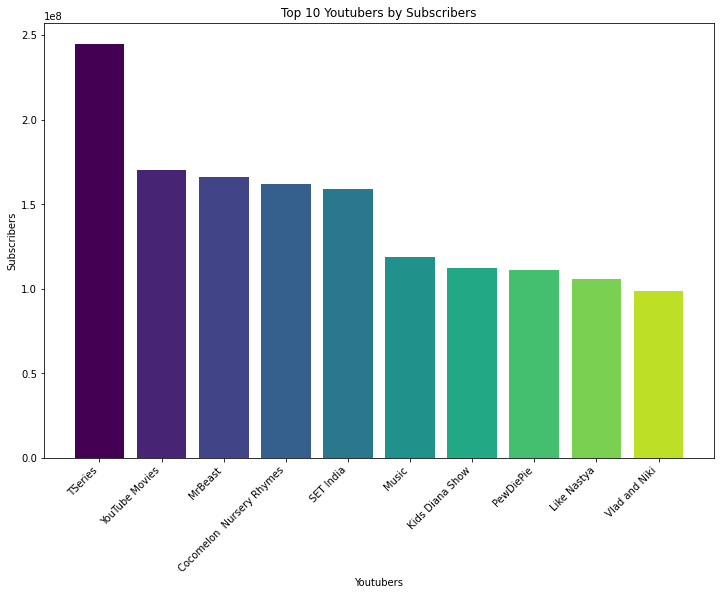

In [32]:
top_10 = df.sort_values(by='Subscribers',ascending=False).head(10)


# Create a color palette
colors = plt.cm.viridis(np.linspace(0,1,11))

# Plot
plt.figure(figsize=(12,8))
bars = plt.bar(top_10['Youtuber'],top_10['Subscribers'],color = colors)

plt.xlabel('Youtubers')
plt.ylabel('Subscribers')
plt.title('Top 10 Youtubers by Subscribers')

plt.xticks(rotation=45,ha='right')
plt.show()

#### Plotting the chart for Top 10 youtubers in terms of views

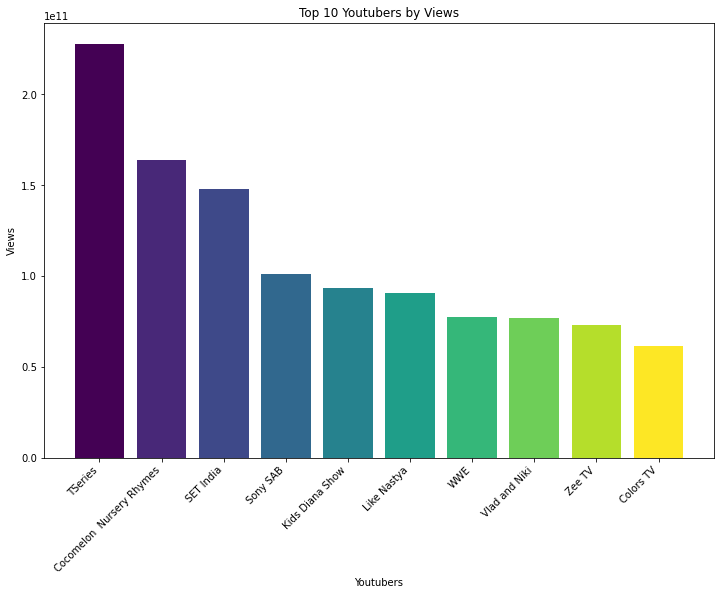

In [34]:
top_10_views = df.sort_values('VideoViews',ascending=False).head(10)

colors = plt.cm.viridis(np.linspace(0,1,10))

# Plot
plt.figure(figsize=(12,8))
bars = plt.bar(top_10_views['Youtuber'],top_10_views['VideoViews'],color = colors)

plt.xlabel('Youtubers')
plt.ylabel('Views')
plt.title('Top 10 Youtubers by Views')

plt.xticks(rotation=45,ha='right')
plt.show()

### How do videos correlate with the number of subscribers?

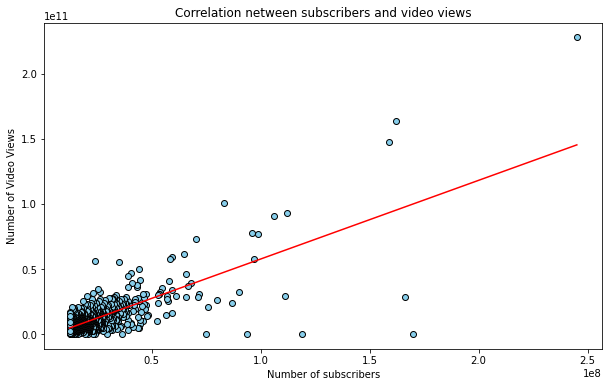

correlation coefficient : 0.75


In [38]:
X = df['Subscribers']
y = df['VideoViews']

plt.figure(figsize=(10,6))
plt.scatter(X,y,color='skyblue',edgecolor='black')

# Calculate the line of best fits
coefficients = np.polyfit(X,y,1)
polynomial = np.poly1d(coefficients)

ys = polynomial(X)

plt.plot(X,ys,color='red')

plt.title('Correlation netween subscribers and video views')
plt.xlabel('Number of subscribers')
plt.ylabel('Number of Video Views')
plt.show()

# Calculate and print the correaltion coefficient
corr_coef = np.corrcoef(X,y)[0,1]
print(f'correlation coefficient : {corr_coef:.2f}')

## Is there a relationship between the number of video uploads and the number of subscrbers or video views?

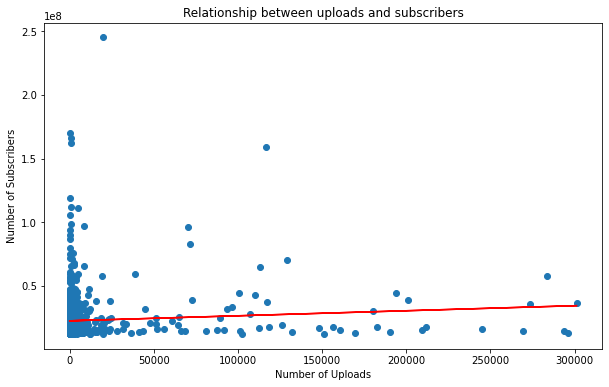

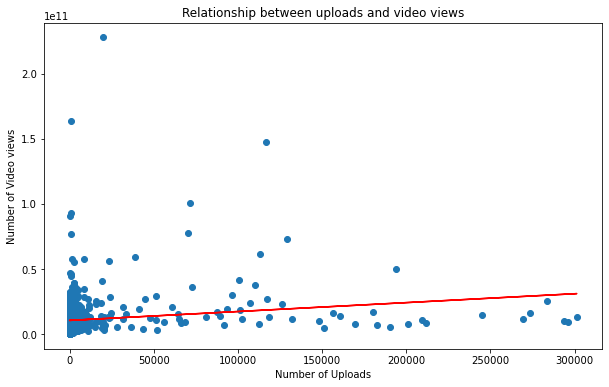

In [40]:
# Plot the relationship beween uploads and subscribers
plt.figure(figsize=(10,6))
plt.scatter(df['Uploads'],df['Subscribers'])
plt.xlabel('Number of Uploads')
plt.ylabel('Number of Subscribers')

plt.title('Relationship between uploads and subscribers')

# Calculate the line of best fit for uploads
m,b = np.polyfit(df['Uploads'],df['Subscribers'],1)
plt.plot(df['Uploads'],m*df['Uploads'] + b,color = 'red')

plt.show()


# Plot the relationship beween uploads and video views
plt.figure(figsize=(10,6))
plt.scatter(df['Uploads'],df['VideoViews'])
plt.xlabel('Number of Uploads')
plt.ylabel('Number of Video views')

plt.title('Relationship between uploads and video views')

# Calculate the line of best fit for uploads
m,b = np.polyfit(df['Uploads'],df['VideoViews'],1)
plt.plot(df['Uploads'],m*df['Uploads'] + b,color = 'red')

plt.show()

Video views and Subscribers are not highly correlated to the number of Uploads. The channel that upload more vdeos, do not necessarily have more subscribers.

## How do subscriber counts and video views vary across different categories?

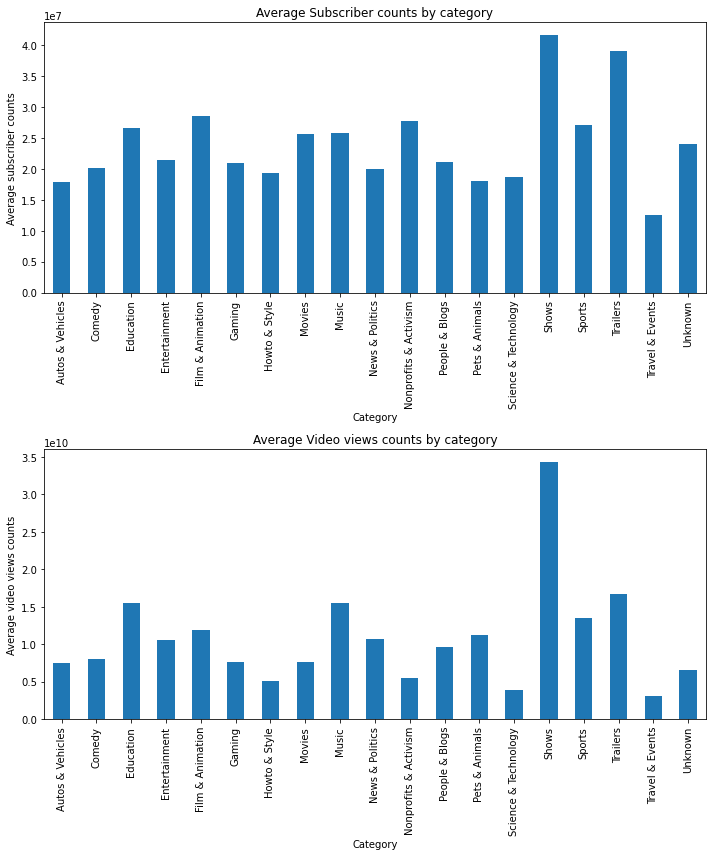

In [45]:
# Calculating mean
avg_subscribers = df.groupby('Category')['Subscribers'].mean()
avg_video_views = df.groupby('Category')['VideoViews'].mean()

# Create bar plots
fig,axs = plt.subplots(2,1,figsize=(10,12))

avg_subscribers.plot(kind='bar',ax=axs[0])
axs[0].set_title('Average Subscriber counts by category')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Average subscriber counts')


avg_video_views.plot(kind='bar',ax=axs[1])
axs[1].set_title('Average Video views counts by category')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Average video views counts')

plt.tight_layout()
plt.show()

## Creating Correlation table to check variables affecting number of subscribers

Subscribers                 1.000000
VideoViews                  0.751599
Uploads                     0.077003
SubscribersForLast30Days    0.273026
AverageYearEarning          0.389084
Name: Subscribers, dtype: float64


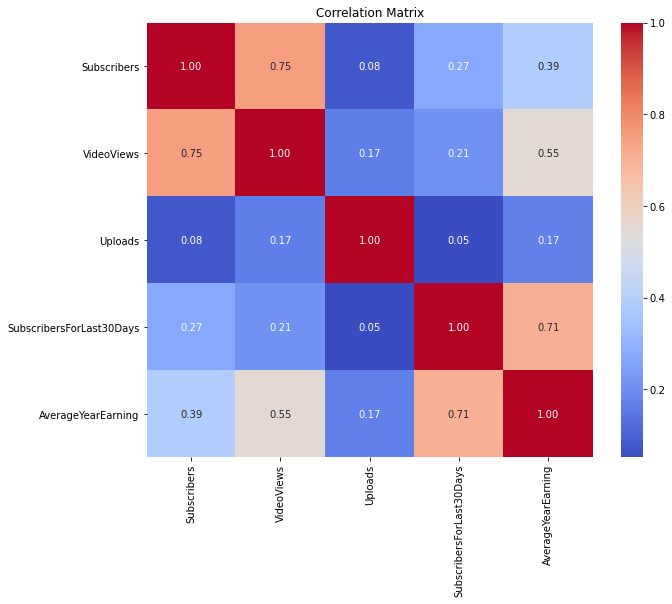

In [47]:
df['AverageYearEarning'] = (df['HighestYearlyEarnings'] + df['LowestYearlyEarnings']) / 2


selected = df[['Subscribers','VideoViews','Uploads','SubscribersForLast30Days','AverageYearEarning']]

corr_matrix = selected.corr()

subs_corr = corr_matrix['Subscribers']

print(subs_corr)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',cbar = True)
plt.title('Correlation Matrix')
plt.show()